# Importing packages and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
oscars=pd.read_csv('the_oscar_award.csv')
oscars.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [3]:
oscars.shape

(10395, 7)

In [4]:
oscars.describe()

,year_film,year_ceremony,ceremony
count,10395.000000,10395.000000,10395.000000
mean,1974.474555,1975.474555,47.500144
std,26.145642,26.145642,26.102352
min,1927.000000,1928.000000,1.000000
25%,1951.000000,1952.000000,24.000000
50%,1974.000000,1975.000000,47.000000
75%,1998.000000,1999.000000,71.000000
max,2019.000000,2020.000000,92.000000


In [5]:
oscars.isna().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               0
film             304
winner             0
dtype: int64

In [6]:
## For now, will drop missing values, but it is good to know what we are taking away
oscars_nulls=oscars[oscars['film'].isnull()][['year_film','winner', 'category']]
display(oscars_nulls.category.value_counts())

#Look like the majority is honorary award given to an individual, thus no movie

HONORARY AWARD                          124
SPECIAL AWARD                            56
IRVING G. THALBERG MEMORIAL AWARD        45
JEAN HERSHOLT HUMANITARIAN AWARD         39
ASSISTANT DIRECTOR                       18
SOUND RECORDING                           8
HONORARY FOREIGN LANGUAGE FILM AWARD      5
SPECIAL ACHIEVEMENT AWARD                 3
ENGINEERING EFFECTS                       2
WRITING (Title Writing)                   2
SPECIAL FOREIGN LANGUAGE FILM AWARD       2
Name: category, dtype: int64

In [7]:
# Just checking what they are
oscars[(oscars['category'].isin(oscars_nulls.category.value_counts().index)) & (oscars['film'].isnull())]

,year_film,year_ceremony,ceremony,category,name,film,winner
16,1927,1928,1,ENGINEERING EFFECTS,Ralph Hammeras,NaN,False
18,1927,1928,1,ENGINEERING EFFECTS,Nugent Slaughter,NaN,False
31,1927,1928,1,WRITING (Title Writing),Joseph Farnham,NaN,True
32,1927,1928,1,WRITING (Title Writing),"George Marion, Jr.",NaN,False
33,1927,1928,1,SPECIAL AWARD,Warner Bros.,NaN,True
...,...,...,...,...,...,...,...
10266,2018,2019,91,IRVING G. THALBERG MEMORIAL AWARD,Kathleen Kennedy and Frank Marshall,NaN,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


In [8]:
oscars=oscars.dropna()
oscars.shape
# 10k movies to look at. I am sure, I'll find somethig interesting to watch

(10091, 7)

# Award categories 

There are over 100 categories in the dataset.
Fortunately, Wikipedia lists the  most important awards (the big five): 
- Best Picture
- Best Director
- Best Actor
- Best Actress
- Best Screenplay 

So, let's focus on them!

To do that, I loop through categories, clean-up (systematise names) - intuitaviely 100 categories is too much.

And then categorise them into the big five or not

In [9]:
by_cat=oscars.groupby(by='category', as_index=False).agg({'film':'count'})
by_cat=by_cat.sort_values(by='film', ascending=False, ignore_index=True)
print(len(by_cat))
display(by_cat.head(10))

104


,category,film
0,DIRECTING,449
1,FILM EDITING,430
2,ACTOR IN A SUPPORTING ROLE,420
3,ACTRESS IN A SUPPORTING ROLE,420
4,DOCUMENTARY (Short Subject),368
5,DOCUMENTARY (Feature),335
6,BEST PICTURE,333
7,CINEMATOGRAPHY,318
8,FOREIGN LANGUAGE FILM,315
9,ART DIRECTION,307


In [10]:
#Rewrite all categories in lower-case
oscars['category']=[word.lower() for word in oscars['category']]

## Definiting useful functions

In [11]:
#copying the category column, I like to have a back-up and will tinker with the category_adj column
oscars['category_adj']=oscars['category']

In [12]:
def unique_categories(name):
    '''The function takes and argument "name", searches in the categories for the keyword("name") and returns a list unique categories that contain the keyword'''
    words_found=[]
    for category in oscars['category']:
        words_found.append(category.find(name))

    #indicies of all titles with the key word "name"
    idices_with_var=[i for (i,m) in list(enumerate(words_found)) if m!=-1]

    #extracting catoegy names including the key word "name"
    names_only = [m for (i,m) in list(enumerate(oscars['category'])) if (i in idices_with_var)]

    #returning unique values
    return list(set(names_only))

In [13]:
def replacing_categories(list_to_replace, new_category):
    '''the function replaces a list of strings that should be repaced with a new string in the category_adj column,
     and returns a message with the number of replacements that have been done'''
    for old_category in list_to_replace:
        oscars['category_adj'].replace(to_replace=old_category, value=new_category, inplace=True)
    frequency_of_new_category=len(oscars[oscars['category_adj']==new_category])
    message = f'{frequency_of_new_category} category have been replaced in category_adj column with "{new_category}"'
    return message

## Screenplay

In [14]:
display(unique_categories('screenplay'))

['writing (story and screenplay--based on material not previously published or produced)',
 'writing (screenplay--original)',
 'writing (original screenplay)',
 'writing (story and screenplay--based on factual material or material not previously published or produced)',
 'writing (screenplay based on material from another medium)',
 'writing (screenplay)',
 'writing (story and screenplay--written directly for the screen)',
 'writing (screenplay--adapted)',
 'writing (screenplay written directly for the screen--based on factual material or on story material not previously published or produced)',
 'writing (screenplay written directly for the screen)',
 'writing (screenplay--based on material from another medium)',
 'writing (adapted screenplay)',
 'writing (screenplay adapted from other material)',
 'writing (screenplay based on material previously produced or published)',
 'writing (story and screenplay)']

Accordig to the definition I have found for the screenplay awards, it should be original screenplay, so let us cluster together categories that look like original screeenplay into one.
Also, for me, I really enjoy watching movies with orignal plot:)

In [15]:
#unifying screenplay
#manually pick them up from the set above
names_to_replace=['writing (original screenplay)','writing (screenplay written directly for the screen)',
 'writing (screenplay written directly for the screen--based on factual material or on story material not previously published or produced)',
 'writing (screenplay)', 'writing (screenplay--original)','writing (story and screenplay)','writing (story and screenplay--based on factual material or material not previously published or produced)','writing (story and screenplay--based on material not previously published or produced)',
 'writing (story and screenplay--written directly for the screen)']

print(replacing_categories(names_to_replace, 'original_screenplay'))

499 category have been replaced in category_adj column with "original_screenplay"


Now, I will replicate the method for the other categories. 

## Best Picture

In [16]:
display(unique_categories('picture'))

['writing (original motion picture story)',
 'outstanding motion picture',
 'music (music score of a dramatic picture)',
 'music (scoring of a musical picture)',
 'music (music score of a dramatic or comedy picture)',
 'directing (comedy picture)',
 'music (original score--for a motion picture [not a musical])',
 'outstanding picture',
 'music (score of a musical picture--original or adaptation)',
 'writing (motion picture story)',
 'directing (dramatic picture)',
 'best motion picture',
 'music (song--original for the picture)',
 'best picture',
 'unique and artistic picture']

In [17]:
names_to_replace=['best motion picture', 'best picture' ]

print(replacing_categories(names_to_replace, 'best_picture'))

423 category have been replaced in category_adj column with "best_picture"


## Actor

In [18]:
display(unique_categories('actor'))

['actor', 'actor in a leading role', 'actor in a supporting role']

Yes, I agree, my chosing of the actors is rather arbitrary... How do I know that the 'actor' and 'actor in a leading role' fall into the same category? 

From the client perspective (me & my family) it does not really matter - leading actor / actor are likely to add more value to the viewer. Simly, because one spends more time with them.

But sill, I could run a quick check in the end of the analysis to make sure that no movie got two 'the big five' awards for actor in the same year

In [19]:
names_to_replace=['actor', 'actor in a leading role']

print(replacing_categories(names_to_replace, 'best_actor'))

452 category have been replaced in category_adj column with "best_actor"


## Actress

In [20]:
display(unique_categories('actress'))

['actress', 'actress in a supporting role', 'actress in a leading role']

In [21]:
names_to_replace=['actress', 'actress in a leading role']

print(replacing_categories(names_to_replace, 'best_actress'))

456 category have been replaced in category_adj column with "best_actress"


## Director

In [22]:
display(unique_categories('direct'))

['art direction',
 'art direction (color)',
 'assistant director',
 'directing (comedy picture)',
 'dance direction',
 'writing (story and screenplay--written directly for the screen)',
 'directing',
 'writing (screenplay written directly for the screen)',
 'writing (screenplay written directly for the screen--based on factual material or on story material not previously published or produced)',
 'directing (dramatic picture)',
 'art direction (black-and-white)']

In [23]:
names_to_replace=['directing',  'directing (comedy picture)',  'directing (dramatic picture)',]

print(replacing_categories(names_to_replace, 'best_director'))

454 category have been replaced in category_adj column with "best_director"


## Category  adjusted check

In [24]:
# Let us see what the categories look like

the_big_five=['original_screenplay','best_picture', 'best_actress','best_actor', 'best_director']

In [25]:
oscars['the_big_five']=oscars['category_adj'].isin(the_big_five)

In [26]:
top_10_cat_dist=oscars.groupby(by='category_adj', as_index=False)[['film', 'winner']].agg({'film':'count','winner':'mean'}).sort_values(by='film', ascending=False, ignore_index=True ).head(10)
top_10_cat_dist

# In general, we have around 450 movies in each of the big five category and winning rate ~20%
# Now, I could spot that screenplay have more films than other categories and best_picture less with lower 'winner ratio'
# This is likely that I have added too many categories into the screenplay and too few into best_pictures (unless they were taken away in the beginning of the process)
# Since it is analysis is just for 'fun', I will leave it as it is for now

,category_adj,film,winner
0,original_screenplay,499,0.200401
1,best_actress,456,0.203947
2,best_director,454,0.204846
3,best_actor,452,0.205752
4,film editing,430,0.200000
5,best_picture,423,0.179669
6,actor in a supporting role,420,0.200000
7,actress in a supporting role,420,0.200000
8,documentary (short subject),368,0.211957
9,documentary (feature),335,0.229851


# Creating award categories

In [27]:
# Fist, lets create dummy variables for the best_5 and winners. 
# Somehow I see numbers better than True / False
oscars['winner']=oscars['winner'].astype('int')
oscars['the_big_five']=oscars['the_big_five'].astype('int')

In [28]:
# Let us create four new columns, as below:
#1 is True, 0 is False

# a column for those which won one of the big five awards
oscars['big_five_winner']=oscars['winner']*oscars['the_big_five']

# a column for those which were nominated to one of the big five awards, but did not acheive it
oscars['big_five_nominated_only']=oscars['the_big_five']-oscars['big_five_winner']

# a column for those which won an award other than the big five
oscars['other_winner']=oscars['winner']-oscars['big_five_winner']

# a coulumn for those which were nominated to an award other than the big five, but did not acheive it
#This one a bit more tricky. First I change all 0's with 2, and then subtract all winners and films nominated to the big five categories
#then divide by 2 to get dummies
oscars['other_nominate_only']=oscars['winner'].replace(to_replace=0,value=2)
oscars['other_nominate_only']=(oscars['other_nominate_only']-
                               oscars['big_five_winner']-
                               oscars['other_winner']-
                               oscars['big_five_nominated_only']*2
                              )/2


In [29]:
cols= ['other_nominate_only', 
       'other_winner',
       'big_five_nominated_only',
       'big_five_winner',
       'winner', 
       'the_big_five']

display(oscars[cols].sum())

print('------\n')

#Looking at the data, it seems like everything adds upp
print(oscars[['other_nominate_only','other_winner','big_five_nominated_only','big_five_winner']].sum().sum())
print(oscars.shape[0])

other_nominate_only        6183.0
other_winner               1624.0
big_five_nominated_only    1829.0
big_five_winner             455.0
winner                     2079.0
the_big_five               2284.0
dtype: float64

------

10091.0
10091


# Indexing

I would like to create some kind of a simple score to take into account all nominations and awards.
So, 
- winning a big five award: 4 points
- winning another award: 3 points
- nomination to a big five award: 2 points
- nomination to any other award: 1 points

This way may be better to see which movies have been mosty appriciated by critics

Also, good to have a total number of nominations and awards, to compare with other sources:)

In [30]:
#First, I need to group observations by movies, for now, I also take away actors 
summary=oscars.groupby(by='film', as_index=False)[
    ['year_ceremony','other_nominate_only','other_winner','big_five_nominated_only','big_five_winner']].agg({
        'year_ceremony':'mean',
        'big_five_winner':'sum',
        'other_winner':'sum',
        'big_five_nominated_only':'sum',
        'other_nominate_only':'sum'}).sort_values(
    by=['big_five_winner',
        'other_winner',
        'big_five_nominated_only',
        'other_nominate_only'], 
    ascending=False)

#cleanign up the format of certain valuables
summary['year_ceremony']=summary['year_ceremony'].astype('int')
summary['other_nominate_only']=summary['other_nominate_only'].astype('int')
summary.shape

(4833, 6)

In [31]:
#Looks like we have over 4.8k unique movies - I'm sure I'll find something to watch:)
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4833 entries, 2450 to 4832
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   film                     4833 non-null   object
 1   year_ceremony            4833 non-null   int32 
 2   big_five_winner          4833 non-null   int32 
 3   other_winner             4833 non-null   int32 
 4   big_five_nominated_only  4833 non-null   int32 
 5   other_nominate_only      4833 non-null   int32 
dtypes: int32(5), object(1)
memory usage: 169.9+ KB


In [32]:
#creating a column for total number of awards and nomination (to compare to the database in wikipedia or other source)
summary['total_nominations_awards']=(
    summary['big_five_winner']+ 
    summary['other_winner']+
    summary['big_five_nominated_only']+  
    summary['other_nominate_only'])

#indexing as described in the intro to this section
summary['score']=(summary['big_five_winner']*4+ 
                  summary['other_winner']*3+
                  summary['big_five_nominated_only']*2+
                  summary['other_nominate_only']*1)

#sorting the dataframe
summary=summary.sort_values(
    by=['score',
        'big_five_winner',
        'other_winner',
        'big_five_nominated_only',
        'other_nominate_only'], 
    ascending=False).reset_index(drop=True)

In [33]:
summary.head()

,film,year_ceremony,big_five_winner,other_winner,big_five_nominated_only,other_nominate_only,total_nominations_awards,score
0,Titanic,1992,3,9,1,3,16,44
1,A Star Is Born,1974,0,3,9,13,25,40
2,Ben-Hur,1960,3,8,0,1,12,37
3,From Here to Eternity,1954,3,5,3,2,13,35
4,The Lord of the Rings: The Return of the King,2004,2,9,0,0,11,35


# The final list

Since, we are not likely to watch all 4.8k movies. I will select the top ones with score above 30.
There are 15 such movies, distributed across all years.

In [34]:
len(summary[summary['score']>=30])

15

In [35]:
highest_score=summary[summary['score']>=30]
highest_score

,film,year_ceremony,big_five_winner,other_winner,big_five_nominated_only,other_nominate_only,total_nominations_awards,score
0,Titanic,1992,3,9,1,3,16,44
1,A Star Is Born,1974,0,3,9,13,25,40
2,Ben-Hur,1960,3,8,0,1,12,37
3,From Here to Eternity,1954,3,5,3,2,13,35
4,The Lord of the Rings: The Return of the King,2004,2,9,0,0,11,35
5,The English Patient,1997,2,7,2,1,12,34
6,Gone with the Wind,1940,3,5,1,4,13,33
7,West Side Story,1962,2,8,0,1,11,33
8,On the Waterfront,1955,4,4,0,4,12,32
9,Gandhi,1983,4,4,0,3,11,31


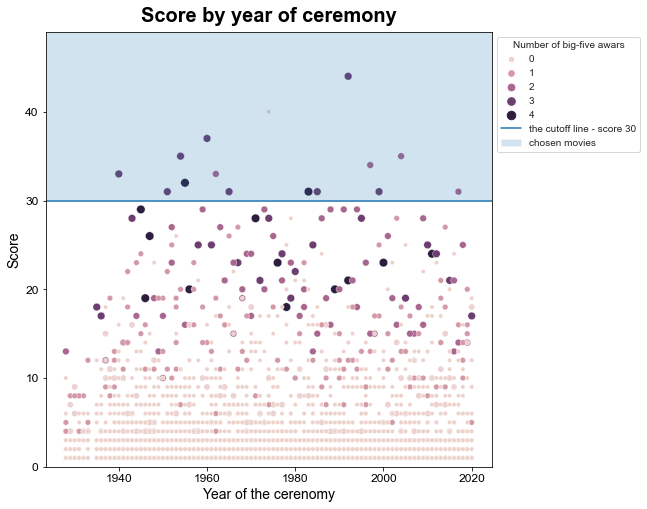

In [36]:
plt.subplots(figsize=(8,8))
sns.set_style('whitegrid')

ax=sns.scatterplot(data=summary, x='year_ceremony', y='score', hue='big_five_winner', size='big_five_winner')

ax.set_ylim(bottom=0, top=(max(summary['score'])+5))
ax.axhline(y=30, label='the cutoff line - score 30')
ax.axhspan(ymin=30, ymax=max(summary['score']+5), xmin=0, xmax=1, alpha=0.2, label='chosen movies')

ax.set_title('Score by year of ceremony', pad=10, weight='bold', fontsize=20)
ax.set_xlabel('Year of the cerenomy', fontsize=14)
ax.set_ylabel('Score',fontsize=14)
ax.tick_params(labelsize='large', grid_alpha=0.5)

plt.legend(title='Number of big-five awars', loc=2, bbox_to_anchor=(1,1), fontsize=10)

plt.show()

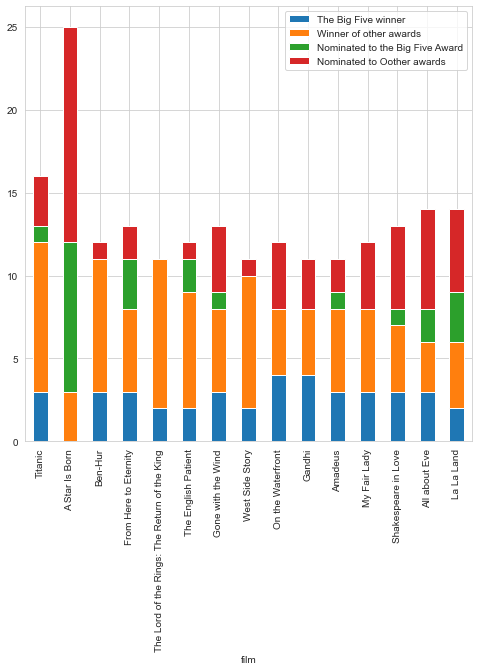

In [40]:
fig, ax=plt.subplots(figsize=(8,8))

highest_score.plot(x='film', 
                   y=['big_five_winner', 'other_winner','big_five_nominated_only','other_nominate_only'],
                   kind='bar', 
                   stacked=True,
                  label=['The Big Five winner','Winner of other awards','Nominated to the Big Five Award','Nominated to Oother awards'],
                  ax=ax)

plt.show()

As you can see above, the score of 30 as the cutoff point removes many movies that won 4 big awards,
but includes movies that have has many nominations - so, there could also be intresting.

I will start to epricially test the hypothesis, and if refutes, I can adjust the cutoff criteria!

Happy watching!!:)

# Comments and next steps

## Comments 

I have compared my results with Wikipedia, and... they do not match.
However, it seems that the descripancy comes from the definition of screenplay.
Looking at two movies, which according to Wikipedia received an award for screenplay (the big five):
- "One Flew over the Cuckoo's Nest"
- "It Happened One Night"

I see that they received an award for adapted screen play, respectively:
- writing (screenplay adapted from other material)
- writing (adaptation)

It also makes sense, because as you could see on the diagram above, no movies received all 5 Oscars...

One of the criteria I used to identified the best screenplay academy award was that it has to be **original**, i.e. not adopted and the movies above do not classify.

Nonetheless, I am ok with that, mostly because my family likes original plot more than an adaptation, but this could also change in the future:)


In [38]:
display(oscars[oscars["film"]=="It Happened One Night"]['category'],
        oscars[oscars["film"]=="One Flew over the Cuckoo's Nest"]['category'])

266                     actor
269                   actress
282                 directing
301    outstanding production
323      writing (adaptation)
Name: category, dtype: object

5299                                               actor
5304                          actor in a supporting role
5310                                             actress
5327                                      cinematography
5337                                           directing
5351                                        film editing
5361                              music (original score)
5375                                        best picture
5397    writing (screenplay adapted from other material)
Name: category, dtype: object

## Next steps

For me, to make a more informed decision, two key features need to be added:
- genre
- imdb score
- put back actors
- length

I think these might be significant to make any kinbd of predictions and informed decisions